In [ ]:
from google.colab import files
uploaded=files.upload()
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from  sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

Saving Admission_Predict.csv to Admission_Predict.csv


In [ ]:
pr=pd.read_csv("Admission_Predict.csv")
pr

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
395         1              0.82  
396         1              0.84  
397         1              0.91  
398         0              0.67  
399         1              0.95  

[400 rows x 9 columns]

In [ ]:
bn=Binarizer(threshold=0.75)
pr['Chance of Admit ']=bn.fit_transform(pr[['Chance of Admit ']])
pr.head

<bound method NDFrame.head of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance

In [ ]:
x=pr.drop('Chance of Admit ',axis=1)
print(x)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  
0           1  
1           1  
2  

0      1
1      1
2      0
3      1
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Chance of Admit , Length: 400, dtype: int64


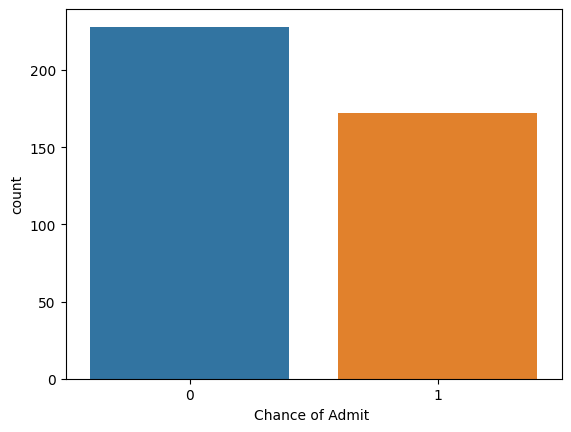

In [ ]:
y=pr['Chance of Admit ']
y=y.astype('int')
print(y)
sn.countplot(x=y);

In [ ]:
print(y.value_counts())

0    228
1    172
Name: Chance of Admit , dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)
print("Training Dataset:",x_train.shape)
print("\n")
print("Testing Dataset:",x_test.shape)
print("\n\n\n")

Training Dataset: (300, 8)


Testing Dataset: (100, 8)






In [ ]:
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
result=pd.DataFrame({'actual':y_test,'predict':y_pred})
print(result)

     actual  predict
132       0        0
309       0        0
341       1        1
196       0        0
246       0        1
..      ...      ...
146       0        0
135       1        1
390       0        0
264       0        0
364       1        1

[100 rows x 2 columns]


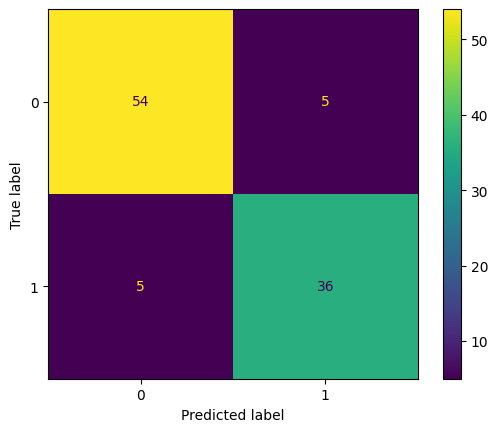

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
print("\n")
print("Accuracy:",accuracy_score(y_test,y_pred))



Accuracy: 0.9


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        59
           1       0.88      0.88      0.88        41

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



In [ ]:
print(y_pred)
print(y_test)

[0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0
 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1]
132    0
309    0
341    1
196    0
246    0
      ..
146    0
135    1
390    0
264    0
364    1
Name: Chance of Admit , Length: 100, dtype: int64


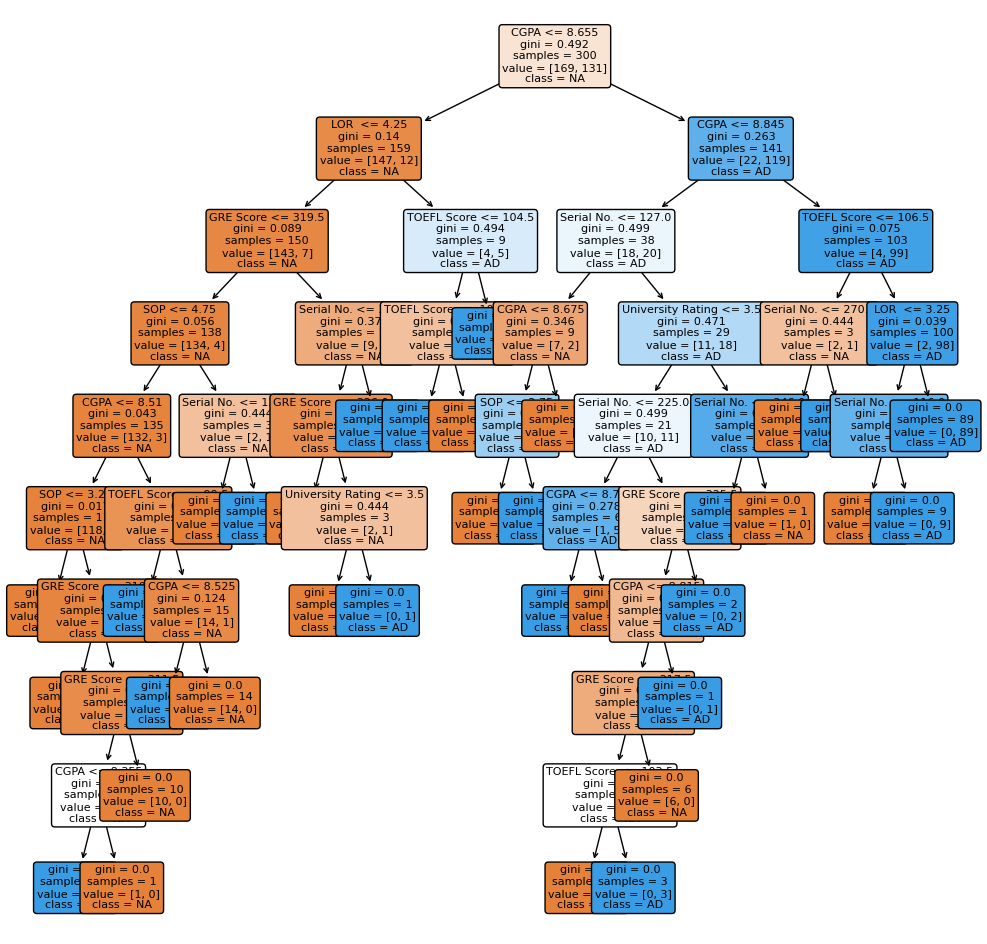

In [ ]:
plt.figure(figsize=(12,12))
plot_tree(classifier,fontsize=8,filled=True,rounded=True,feature_names=x.columns,class_names=('NA','AD'));